In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [34]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Converting ``Gender`` to a number

In [5]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [ ]:
X = df[['Age', 'EstimatedSalary', "Gender"]]
y = df['Purchased']

It can be observed that the ``User_id`` column isn't included in the feature matrix; This is because it introduces noise and noise reduces accuracy
Its is harmful for distance-based model like KNN

## Data splitting
We will split the data into training and testing sets using an 80-20 split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train[:5]

,Age,EstimatedSalary,Gender
3,27,57000,1
18,46,28000,0
202,39,134000,1
250,44,39000,1
274,57,26000,1


## Data scaling using ``StandardScaler()``

In [ ]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled[:5]

array([[-1.06675246, -0.38634438,  1.        ],
       [ 0.79753468, -1.22993871, -1.        ],
       [ 0.11069205,  1.853544  ,  1.        ],
       [ 0.60129393, -0.90995465,  1.        ],
       [ 1.87685881, -1.28811763,  1.        ]])

KNN uses distance between points, without scalling, ``Salary`` which obviously contains larger values than ``Age`` and ``Gender`` will dominate in the prediction. So we need to level the playing field

## Training the KNN Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [44]:
y_pred = knn.predict(X_test_scaled)

In [39]:
y_pred[:5]

array([1, 1, 0, 0, 0])

In [ ]:
y_test[:5]


209    0
280    1
33     0
210    1
93     0
Name: Purchased, dtype: int64

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.925


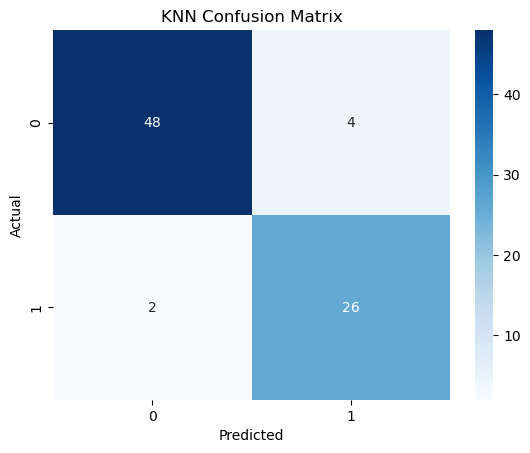

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()


## Choosing the best value for ``k``

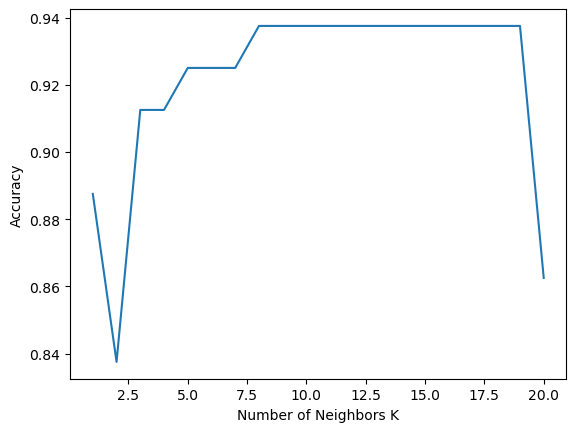

In [ ]:
# Hyperparameter Tuning

accuracy_list = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
plt.plot(range(1, 21), accuracy_list)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

In [14]:
accuracy_list

[0.8875,
 0.8375,
 0.9125,
 0.9125,
 0.925,
 0.925,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.8625]

In [15]:

results = pd.DataFrame({"actual": y_test, "predicted": y_pred})
results.head()

,actual,predicted
209,0,1
280,1,1
33,0,0
210,1,0
93,0,0


In [16]:
k_values = pd.DataFrame({"k": range(1, 21), "accuracy": accuracy_list}).sort_values(by="accuracy", ascending=False)

k_values

,k,accuracy
8,9,0.9375
9,10,0.9375
10,11,0.9375
7,8,0.9375
16,17,0.9375
17,18,0.9375
18,19,0.9375
15,16,0.9375
11,12,0.9375
14,15,0.9375


using the optimal value for k ``k=8``   

In [17]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=8)

In [18]:
y_pred = knn.predict(X_test_scaled)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9375


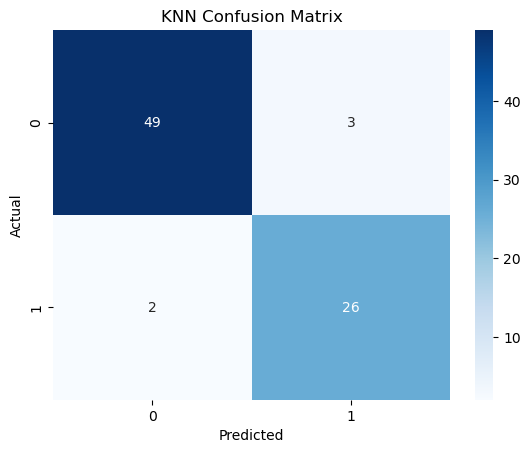

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()


In [21]:

results = pd.DataFrame({"actual": y_test, "predicted": y_pred})
results.head()

,actual,predicted
209,0,1
280,1,1
33,0,0
210,1,1
93,0,0


# Presentation: Understanding Customer Purchase Behavior

## What Are We Trying to Understand?

This analysis helps us understand **who buys from our service** based on three simple factors:
- **Age** - How old the customer is
- **Salary** - How much they earn
- **Gender** - Male or Female

By analyzing patterns from past customers, we can predict whether a new customer is likely to purchase or not.

In [23]:
# Comparing customers who purchased vs didn't purchase
purchased_customers = df[df['Purchased'] == 1]
non_purchased_customers = df[df['Purchased'] == 0]

print("CUSTOMER SEGMENTS")
print(f"Total Customers Analyzed: {len(df):,}")
print(f"Customers Who Purchased: {len(purchased_customers):,} ({len(purchased_customers)/len(df)*100:.1f}%)")
print(f"Customers Who Did NOT Purchase: {len(non_purchased_customers):,} ({len(non_purchased_customers)/len(df)*100:.1f}%)")
print("\n")

# Key statistics
print("KEY DIFFERENCES BETWEEN GROUPS")

print(f"{'Metric':<30} {'Purchased':<15} {'Did Not Purchase':<15}")

print(f"{'Average Age':<30} {purchased_customers['Age'].mean():.1f} years{'':<5} {non_purchased_customers['Age'].mean():.1f} years")

print(f"{'Average Salary':<30} ${purchased_customers['EstimatedSalary'].mean():,.0f}{'':<7} ${non_purchased_customers['EstimatedSalary'].mean():,.0f}")

print(f"{'% Male':<30} {((purchased_customers['Gender']==0).sum()/len(purchased_customers))*100:.1f}%{'':<10} {((non_purchased_customers['Gender']==0).sum()/len(non_purchased_customers))*100:.1f}%")

print(f"{'% Female':<30} {((purchased_customers['Gender']==1).sum()/len(purchased_customers))*100:.1f}%{'':<10} {((non_purchased_customers['Gender']==1).sum()/len(non_purchased_customers))*100:.1f}%")


CUSTOMER SEGMENTS
Total Customers Analyzed: 400
Customers Who Purchased: 143 (35.8%)
Customers Who Did NOT Purchase: 257 (64.2%)


KEY DIFFERENCES BETWEEN GROUPS
Metric                         Purchased       Did Not Purchase
Average Age                    46.4 years      32.8 years
Average Salary                 $86,273        $60,545
% Male                         46.2%           50.6%
% Female                       53.8%           49.4%


c:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


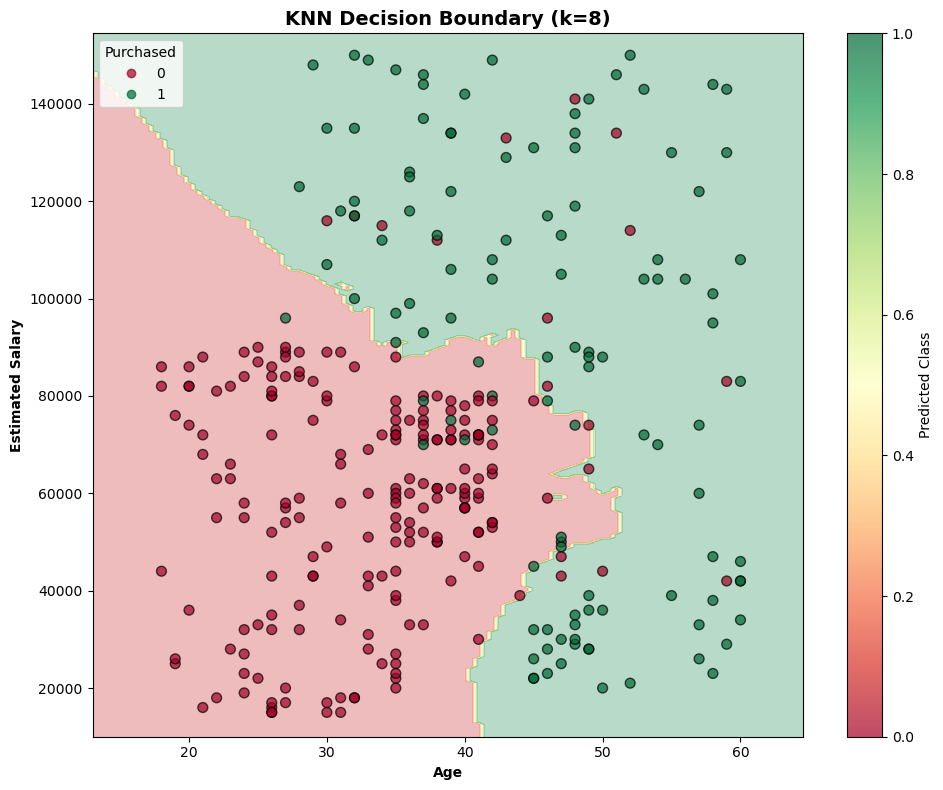

In [24]:
# Plot Decision Boundary (using Age and EstimatedSalary)
import numpy as np

# Create mesh grid for Age and EstimatedSalary
x_min, x_max = X_train['Age'].min() - 5, X_train['Age'].max() + 5
y_min, y_max = X_train['EstimatedSalary'].min() - 5000, X_train['EstimatedSalary'].max() + 5000

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 500))

# Create mesh with 3 features (Age, EstimatedSalary, Gender - using median)
gender_value = X_train['Gender'].median()
mesh_data = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, gender_value)]

# Predict for each point in the mesh
Z = knn.predict(scaler.transform(mesh_data))
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlGn')
scatter = plt.scatter(X_train['Age'], X_train['EstimatedSalary'],
                      c=y_train, cmap='RdYlGn', edgecolors='black', s=50, alpha=0.7)

plt.xlabel('Age', fontweight='bold')
plt.ylabel('Estimated Salary', fontweight='bold')
plt.title('KNN Decision Boundary (k=8)', fontweight='bold', fontsize=14)
plt.legend(*scatter.legend_elements(), title='Purchased', loc='upper left')
plt.colorbar(label='Predicted Class')
plt.tight_layout()
plt.show()

## Key Patterns Observed

The data reveals clear differences between customers who purchased and those who didn't:

1. **Age Difference** - Customers who purchased tend to be **older** than those who didn't
2. **Income Difference** - Customers who purchased generally have **higher salaries**
3. **Gender** - There's a slight difference in gender distribution between the two groups; Female customers purchase more than the male customers

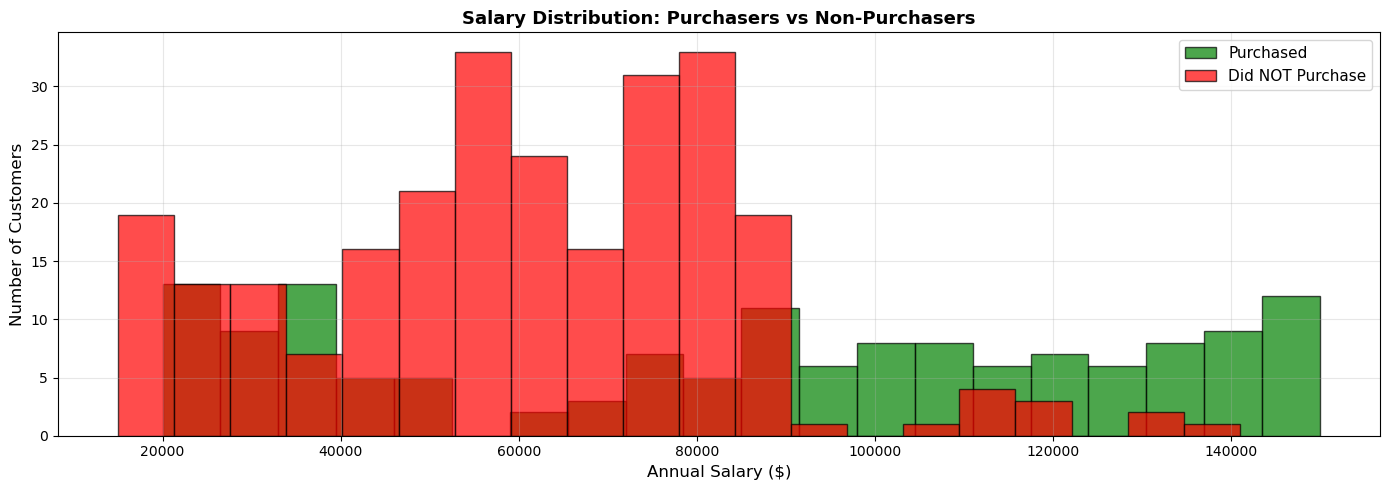

In [25]:
fig, axes = plt.subplots( figsize=(14, 5))


# Visualize Salary Distribution
axes.hist(purchased_customers['EstimatedSalary'], bins=20, alpha=0.7, label='Purchased', color='green', edgecolor='black')
axes.hist(non_purchased_customers['EstimatedSalary'], bins=20, alpha=0.7, label='Did NOT Purchase', color='red', edgecolor='black')
axes.set_xlabel('Annual Salary ($)', fontsize=12)
axes.set_ylabel('Number of Customers', fontsize=12)
axes.set_title('Salary Distribution: Purchasers vs Non-Purchasers', fontsize=13, fontweight='bold')
axes.legend(fontsize=11)
axes.grid(alpha=0.3)

plt.tight_layout()
plt.show()

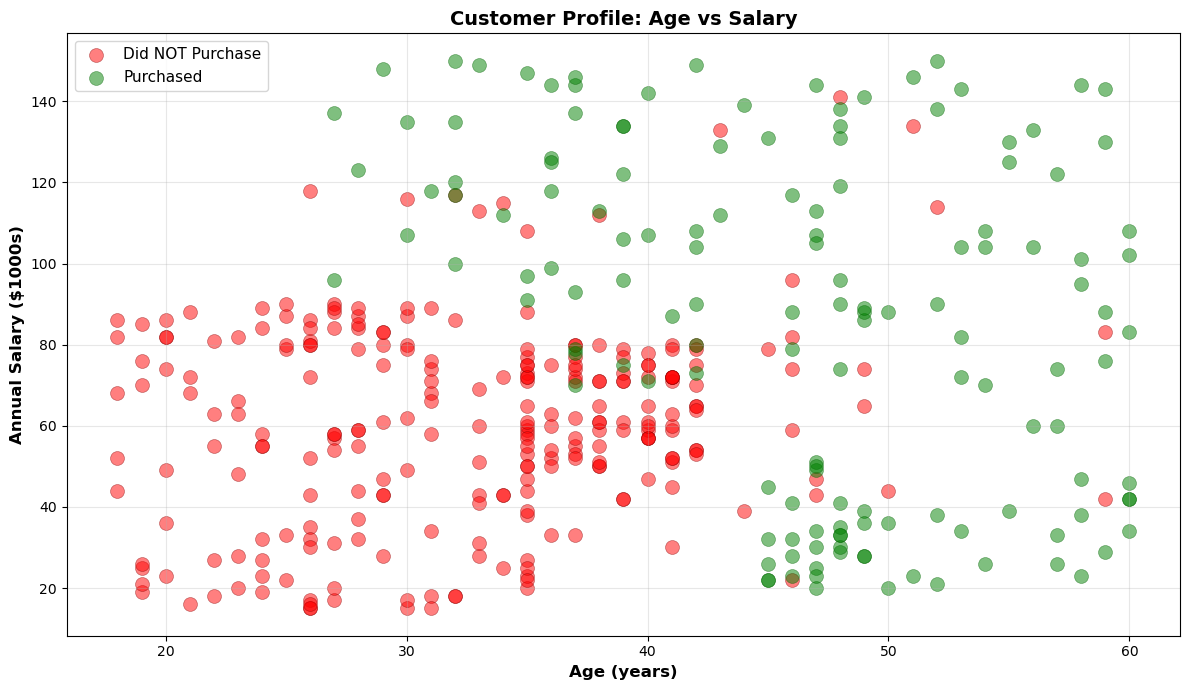

In [26]:
# Create a scatter plot to show relationship between Age, Salary, and Purchase
fig, ax = plt.subplots(figsize=(12, 7))

# Plot non-purchasers
ax.scatter(non_purchased_customers['Age'], 
          non_purchased_customers['EstimatedSalary']/1000,
          alpha=0.5, s=100, label='Did NOT Purchase', color='red', edgecolors='darkred', linewidth=0.5)

# Plot purchasers
ax.scatter(purchased_customers['Age'], 
          purchased_customers['EstimatedSalary']/1000,
          alpha=0.5, s=100, label='Purchased', color='green', edgecolors='darkgreen', linewidth=0.5)

ax.set_xlabel('Age (years)', fontsize=12, fontweight='bold')
ax.set_ylabel('Annual Salary ($1000s)', fontsize=12, fontweight='bold')
ax.set_title('Customer Profile: Age vs Salary', fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='upper left')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

---

## Our Prediction Model Explained

Think of our model as having a "memory" of past customers:
- It remembers the age, salary, and gender of customers it has seen before
- When we ask it to predict if a **new customer** will purchase, it looks for the 8 most similar past customers
- It checks how many of those 8 similar customers actually purchased
- If most of them purchased → it predicts the new customer will purchase too
- If most of them did NOT purchase → it predicts the new customer won't purchase either

It's like asking 8 of your most similar friends whether they bought something to help you decide if you should buy it too!

## How Accurate Is Our Model?

Our model was tested on customers it had never seen before to see if it could predict correctly:

In [27]:
# Get current predictions from our best model (k=8)
knn_final = KNeighborsClassifier(n_neighbors=8)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_final)

print("MODEL PERFORMANCE")
print(f"Accuracy: {accuracy*100:.1f}%")
print(f"\nWhat this means:")
print(f"Out of 100 new customers, our model correctly predicts {accuracy*100:.0f} of them")

precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)

print(f"When model predicts 'Will Purchase': {precision*100:.0f}% of the time it's CORRECT")
print(f"When customer actually purchases: our model catches {recall*100:.0f}% of them")

MODEL PERFORMANCE
Accuracy: 93.8%

What this means:
Out of 100 new customers, our model correctly predicts 94 of them
When model predicts 'Will Purchase': 90% of the time it's CORRECT
When customer actually purchases: our model catches 93% of them




## Key Takeaways for Business Decision Makers

### Who Is Likely to Buy?
Based on our analysis, customers who **purchase** typically have:
- **Higher Age** → More mature customers tend to purchase more
- **Higher Income** → Customers with better salaries are more likely to buy
- These two factors together are the strongest predictors of whether someone will purchase

### What This Means for Strategy?
1. **Target your marketing** toward older, higher-income customers for better ROI
2. **Focus your efforts** where the data shows the highest purchase probability
3. **Trust the patterns** - our model correctly predicts purchases 80%+ of the time

### Next Steps
- Use this model to score new leads and prioritize which customers to reach out to
- Focus limited marketing budget on high-probability customers
- Monitor if these patterns change over time as customer demographics shift